In [1]:
import pickle
import geopandas 
import pandas as pd
pd.set_option('max_colwidth', 200)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns 
sns.set()
import os
from os import listdir
from os.path import isfile, join
import descartes
import csv
import numpy as np
%matplotlib inline
from random import sample
from math import sin, cos, sqrt, atan2, radians, acos
import numpy as np
import math
import copy
import time

lakes = geopandas.read_file("Lakes_and_Rivers")
madison = geopandas.read_file("City_Limit")


In [2]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)


In [3]:
g=load_obj('graph_final_fixed')

In [18]:
g

{'1379_25260': [{'destination': '1717_25301',
   'travel_time': 41,
   'trip_id': 884545,
   'bus_name': 2,
   'full_bus_name': '2_NORTH TFR PT'}],
 '1717_25301': [{'destination': '1923_26296',
   'travel_time': 995,
   'trip_id': 884531,
   'bus_name': 2,
   'full_bus_name': '2_NORTH TFR PT'},
  {'destination': '1923_25352',
   'travel_time': 51,
   'trip_id': 884545,
   'bus_name': 2,
   'full_bus_name': '2_NORTH TFR PT'},
  {'destination': '1923_26236',
   'travel_time': 935,
   'trip_id': 904832,
   'bus_name': 2,
   'full_bus_name': '2_NORTH TRANSFER'}],
 '1923_25352': [{'destination': '1715_26333',
   'travel_time': 981,
   'trip_id': 884531,
   'bus_name': 2,
   'full_bus_name': '2_NORTH TFR PT'},
  {'destination': '1715_25399',
   'travel_time': 47,
   'trip_id': 884545,
   'bus_name': 2,
   'full_bus_name': '2_NORTH TFR PT'},
  {'destination': '1715_26273',
   'travel_time': 921,
   'trip_id': 904832,
   'bus_name': 2,
   'full_bus_name': '2_NORTH TRANSFER'}],
 '1715_25399': [

In [97]:

def get_stop(node):
    return int(node.split("_")[0])
    
def get_seconds(node):
    return int(node.split("_")[1])
    
# depth-first search through bus system
#
# graph: dict, key=node name, val=edge list
# node: node name
# max_time: last time (in seconds) beyond which we don't search (None if no limit)
# visited: set of nodes visited already (to avoid repeats)
def dfs(graph, node, max_time=None, visited=None, parent_node= None):
    if visited == None:
        visited = set()
    node_time = get_seconds(node)
    if max_time != None and node_time > max_time:
        return visited

    if node in visited:
        return visited
    
    if parent_node:
        trip_id = parent_node['trip_id'] 
    else: 
        trip_id = None
        
    visited.add(node)
    for edge in graph[node]:
            if not trip_id:
                dfs(graph, edge["destination"], max_time, visited, edge)
            else:
                if 'DROP OFF' in edge['full_bus_name']:
                    if edge['trip_id'] == trip_id:
                        dfs(graph, edge["destination"], max_time, visited, edge)

                    else: 
                        continue 
                else:
                    dfs(graph, edge["destination"], max_time, visited, edge)
    return visited


def stops_reachable_percent(start, hours=None):
    limit = None
    if hours != None:
        limit = get_seconds(start) + hours * 3600 # hours to seconds
    reachable = dfs(g, start, limit)
    return reachable
#     reachable_stops = {get_stop(node) for node in reachable}
#     all_stops = {get_stop(node) for node in g.keys()}
#     return len(reachable_stops) / len(all_stops)    

# # where can we get if we start at this place/time, and have no time limit?
# print(stops_reachable_percent('1561_25223'))

# # one hour limit?
# print(stops_reachable_percent('1379_25260', 1))

# # two hour limit?
# print(stops_reachable_percent('1561_25223', 2))
f=stops_reachable_percent('883_25435' , 1)

In [98]:
# dic = {}
# past_percent = -1
# for i,node in enumerate(g):
#     dic[node] = stops_reachable_percent(node, 1)
#     if i*100//len(g) != past_percent:
#         past_percent = i*100//len(g)
#         print("%d%% done" % past_percent)


In [4]:
def get_stop(node):
    return int(node.split("_")[0])
    
def get_seconds(node):
    return int(node.split("_")[1])
    
# depth-first search through bus system
#
# graph: dict, key=node name, val=edge list
# node: node name
# max_time: last time (in seconds) beyond which we don't search (None if no limit)
# visited: set of nodes visited already (to avoid repeats)
def dfs(graph, node, max_time=None, visited=None):
    if visited == None:
        visited = set()

    node_time = get_seconds(node)
    if max_time != None and node_time > max_time:
        return visited

    if node in visited:
        return visited

    visited.add(node)
    for edge in graph[node]:
        dfs(graph, edge["destination"], max_time, visited)

    return visited


def stops_reachable_percent(start, hours=None):
    limit = None
    if hours != None:
        limit = get_seconds(start) + hours * 3600 # hours to seconds
    reachable = dfs(g, start, limit)
    return reachable
#     reachable_stops = {get_stop(node) for node in reachable}
#     all_stops = {get_stop(node) for node in g.keys()}
#     return len(reachable_stops) / len(all_stops)    

# # where can we get if we start at this place/time, and have no time limit?
# print(stops_reachable_percent('1561_25223'))

# # one hour limit?
# print(stops_reachable_percent('1561_25223', 1))

# # two hour limit?
# print(stops_reachable_percent('1561_25223', 2))
f=stops_reachable_percent('883_25435' , 1)

In [7]:
list_of_stops = []
for s in f:
    sls =s.split('_', 1)[0] 
    if sls not in list_of_stops:
        list_of_stops.append(sls)
            

In [113]:
list_of_stops

['624',
 '6798',
 '1329',
 '2712',
 '1199',
 '1720',
 '1391',
 '234',
 '2061',
 '9168',
 '9182',
 '1151',
 '2945',
 '146',
 '5950',
 '1324',
 '9306',
 '770',
 '2034',
 '1530',
 '2996',
 '2605',
 '2741',
 '456',
 '1787',
 '1101',
 '5733',
 '906',
 '1127',
 '564',
 '916',
 '1350',
 '1766',
 '765',
 '2717',
 '4100',
 '1188',
 '593',
 '9101',
 '2978',
 '133',
 '816',
 '9778',
 '1382',
 '803',
 '2872',
 '9630',
 '2874',
 '2349',
 '8194',
 '391',
 '568',
 '441',
 '1928',
 '2561',
 '703',
 '1310',
 '1883',
 '2212',
 '1133',
 '4788',
 '252',
 '565',
 '6684',
 '7175',
 '1839',
 '2608',
 '2938',
 '4395',
 '5765',
 '2620',
 '2101',
 '1504',
 '749',
 '1311',
 '739',
 '173',
 '2496',
 '2400',
 '670',
 '435',
 '9554',
 '2320',
 '1478',
 '1873',
 '1558',
 '1513',
 '2698',
 '1427',
 '2246',
 '1394',
 '1872',
 '2201',
 '1704',
 '2039',
 '2643',
 '9339',
 '1842',
 '1301',
 '6288',
 '1959',
 '1730',
 '9340',
 '1150',
 '3100',
 '6138',
 '3368',
 '455',
 '3429',
 '1855',
 '1358',
 '1267',
 '2041',
 '9790',

In [7]:
#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161
weekday_bus = geopandas.read_file("Metro_Transit_Ridership_by_Route_Weekday")

#metro data
metro_data = geopandas.read_file("MetroBusRoutes.gdb")
list_metro = []
for index, row in metro_data.iterrows():
    list_metro.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

metro_series = pd.Series(list_metro)
metro_coord = pd.DataFrame({"Coordinates": metro_series})
metro_coord = geopandas.GeoDataFrame(metro_coord, geometry='Coordinates')

#BRT data 
#https://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-stops
# using new data for brt from the madison data instead of the BRT.gdb
brt_data = geopandas.read_file("Bus_Rapid_Transit_Stops")
list_brt = []
for index, row in brt_data.iterrows():
    list_brt.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

brt_series = pd.Series(list_brt)
brt_coord = pd.DataFrame({"Coordinates": brt_series})
brt_coord = geopandas.GeoDataFrame(brt_coord, geometry='Coordinates')

#BRT data lines
#http://data-cityofmadison.opendata.arcgis.com/datasets/bus-rapid-transit-system-lines
brt_data_line = geopandas.read_file("Bus_Rapid_Transit_System_Lines")
brt_coord_line = geopandas.GeoDataFrame(brt_data_line, geometry='geometry')

#https://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-route-weekday?geometry=-89.671%2C42.985%2C-89.23%2C43.161
weekday_bus_with_brt_distance = geopandas.read_file("weekday_bus_with_brt_distance_version_2.gpkg")

#metro bus route data 2019
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes
transit_data = geopandas.read_file("Metro_Transit_Bus_Route_Trips")

#https://developers.google.com/transit/gtfs/reference/
#https://wisc-ds-projects.github.io/f19/projects.html
#tried to find a way to save all the links to a variable but didnt work out. 
stop_table =  pd.read_csv(r"C:\\Users\\이진우\\cs_summer\\Jin_project\\mmt_gtfs\\stops.txt", sep=",", engine='python')
stop_table.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,agency_id,jurisdiction_id,location_type,parent_station,relative_position,cardinal_direction,wheelchair_boarding,primary_street,address_range,cross_location
0,1110,1110,E Dayton & Wisconsin (WB),This EVENT/DETOUR ONLY stop (#1110) is westbound on the 2 block of Dayton St (E) nearside of Wisconsin Ave,43.076428,-89.385920,MMT,CMAD,0,NaN,3,270.0,1,E Dayton,2,Wisconsin
1,1111,1111,W Doty & M L K Junior (EB),This EVENT/DETOUR ONLY stop (#1111) is eastbound on the 1 block of Doty St (W) nearside of Martin Luther King Jr Blvd,43.072938,-89.382354,MMT,CMAD,0,NaN,3,90.0,1,W Doty,1,M L K Junior
2,1124,1124,S Fairchild & W Main (SB),This EVENT/DETOUR ONLY stop (#1124) is southbound on the 98 block of Fairchild St (S) nearside of Main St (W),43.072467,-89.385273,MMT,CMAD,0,NaN,3,180.0,1,S Fairchild,98,W Main
3,1135,1135,N Webster & E Mifflin (NB),This EVENT/DETOUR ONLY stop (#1135) is northbound on the 101 block of Webster St (N) farside of Mifflin St (E),43.077272,-89.383413,MMT,CMAD,0,NaN,1,0.0,1,N Webster,101,E Mifflin
4,1140,1140,E Washington & N Webster (WB),This EVENT/DETOUR ONLY stop (#1140) is westbound on the 200 block of E Washington Ave nearside of Webster St (N),43.076390,-89.381930,MMT,CMAD,0,NaN,3,270.0,1,E Washington,200,N Webster


In [115]:
list_stops = []
row = ''
ls = ['883']
for stops in ls:
    row = stop_table[stop_table['stop_id'] == int(stops)]
    try:
        lat=row['stop_lat'].values[0]
        lon = row['stop_lon'].values[0]
    except:
        print(stops)
        print(row)
        break
    list_stops.append(Point(float(lon),float(lat)))

first_stops_series = pd.Series(list_stops)
first_stops_coord = pd.DataFrame({"Coordinates": first_stops_series})
first_stops_coord = geopandas.GeoDataFrame(first_stops_coord, geometry='Coordinates')

In [116]:
list_stops = []
row = ''
for stops in list_of_stops:
    row = stop_table[stop_table['stop_id'] == int(stops)]
    try:
        lat=row['stop_lat'].values[0]
        lon = row['stop_lon'].values[0]
    except:
        print(stops)
        print(row)
        break
    list_stops.append(Point(float(lon),float(lat)))

stops_series = pd.Series(list_stops)
stops_coord = pd.DataFrame({"Coordinates": stops_series})
stops_coord = geopandas.GeoDataFrame(stops_coord, geometry='Coordinates')

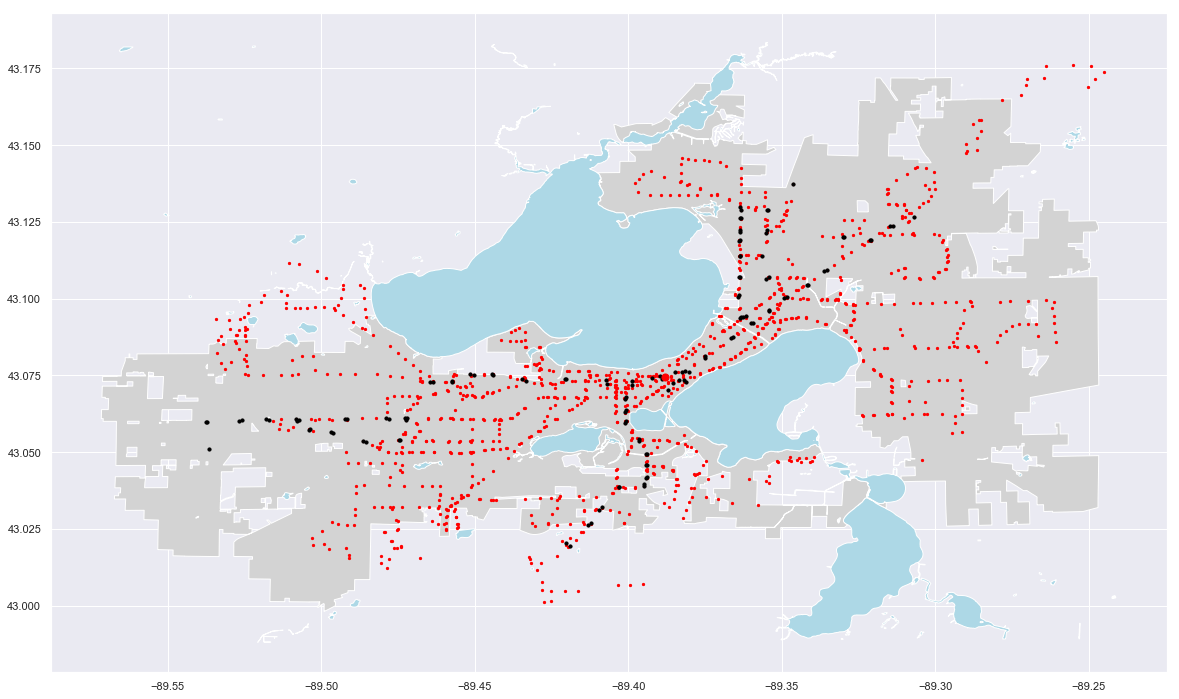

In [117]:
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)

stops_coord.plot(color="red", ax=ax, markersize= 5)
brt_coord.plot(color="black", ax=ax, markersize= 10)
first_stops_coord.plot(color="red", ax=ax, markersize= 50)

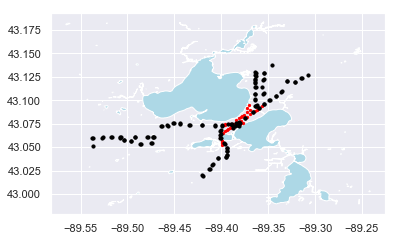

In [8]:
def draw_frame(ax, percent):
    ax.cla()
    f=stops_reachable_percent('883_25435' , 1*percent)
    list_of_stops = []
    for s in f:
        sls =s.split('_', 1)[0] 
        if sls not in list_of_stops:
            list_of_stops.append(sls)
            
    list_stops = []
    row = ''
    for stops in list_of_stops:
        row = stop_table[stop_table['stop_id'] == int(stops)]
        try:
            lat=row['stop_lat'].values[0]
            lon = row['stop_lon'].values[0]
        except:
            print(stops)
            print(row)
            break
        list_stops.append(Point(float(lon),float(lat)))

    stops_series = pd.Series(list_stops)
    stops_coord = pd.DataFrame({"Coordinates": stops_series})
    stops_coord = geopandas.GeoDataFrame(stops_coord, geometry='Coordinates')
    
    #ax = madison.plot(color="lightgray", figsize=(20,20))
    lakes.plot(color="lightblue", ax=ax)

    stops_coord.plot(color="red", ax=ax, markersize= 5)
    brt_coord.plot(color="black", ax=ax, markersize= 10)

    
    
    
fig, ax = plt.subplots()

draw_frame(ax, 0.2)    

In [12]:
%%capture
fig, ax = plt.subplots(figsize=(20,20))

In [13]:
from matplotlib import animation
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

SECONDS = 10
INTERVAL_MS = 200
TOTAL_FRAMES = int(SECONDS * 1000 / INTERVAL_MS)

def update(frame_num):
    draw_frame(ax, frame_num/TOTAL_FRAMES)
    
vid = animation.FuncAnimation(fig, update, frames=TOTAL_FRAMES, interval=INTERVAL_MS)
html = vid.to_html5_video()
HTML(html)

<Figure size 432x288 with 0 Axes>

In [15]:
!echo $ENV:PATH

$ENV:PATH


In [ ]:
hour_coverage = {}
past_percent = -1
for i,node in enumerate(g):
    hour_coverage[node] = stops_reachable_percent(node, 1)
    if i*100//len(g) != past_percent:
        past_percent = i*100//len(g)
        print("%d%% done" % past_percent)
best = max(hour_coverage.values())
print([n for n in g if hour_coverage[n] == best])


In [ ]:
def find_all_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_all_paths(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [ ]:
def get_stop(node):
    return int(node.split("_")[0])
    
def get_seconds(node):
    return int(node.split("_")[1])
    
# depth-first search through bus system
#
# graph: dict, key=node name, val=edge list
# node: node name
# max_time: last time (in seconds) beyond which we don't search (None if no limit)
# visited: set of nodes visited already (to avoid repeats)
def dfs(graph, node, path, max_time=None, visited=None, parent_node=None):

    path = path + [node]
    paths = []
    node_time = get_seconds(node)
    
    if max_time != None and node_time > max_time:
        return [path]
    
    if parent_node:
        trip_id = parent_node['trip_id'] 
    else: 
        trip_id = None

    for edge in graph[node]:
        if not trip_id:
            newpaths = dfs(graph, edge["destination"], path, max_time, visited, edge)
            for newpath in newpaths:
                paths.append(newpath)
        else:
            if 'DROP OFF' in edge['full_bus_name']:
                if edge['trip_id'] == trip_id:
                    newpaths = dfs(graph, edge["destination"], path, max_time, visited, edge)
                    for newpath in newpaths:
                        paths.append(newpath)
                else: 
                    continue 
            else:
                newpaths = dfs(graph, edge["destination"], path, max_time, visited, edge)
                for newpath in newpaths:
                    paths.append(newpath)
    return paths

def stops_reachable_percent(start, hours=None):
    limit = None
    if hours != None:
        limit = get_seconds(start) + hours * 3600 # hours to seconds
    path=[]
    reachable = dfs(g, start, path, limit)
    return reachable
#     reachable_stops = {get_stop(node) for node in reachable}
#     all_stops = {get_stop(node) for node in g.keys()}
#     return len(reachable_stops) / len(all_stops), reachable   

# # where can we get if we start at this place/time, and have no time limit?
# print(stops_reachable_percent('1561_25223'))

# # one hour limit?
# print(stops_reachable_percent('1561_25223', 1))

# two hour limit?
print(stops_reachable_percent('1561_25223', 1))

In [49]:
dic = {}
past_percent = -1
for i,node in enumerate(g):
    dic[node] = stops_reachable_percent(node, 1)
    if i*100//len(g) != past_percent:
        past_percent = i*100//len(g)
        print("%d%% done" % past_percent)


0% done
1% done
2% done
3% done
4% done
5% done
6% done
7% done
8% done
9% done
10% done
11% done
12% done
13% done
14% done
15% done
16% done
17% done
18% done
19% done
20% done
21% done
22% done
23% done
24% done
25% done
26% done
27% done
28% done
29% done
30% done
31% done
32% done
33% done
34% done
35% done
36% done
37% done
38% done
39% done
40% done
41% done
42% done
43% done
44% done
45% done
46% done
47% done


KeyboardInterrupt: 